# Salary Prediction based on Experience - Supervised Regression Project

---

## 1. Problem Definition

**Business Problem:**  
In the corporate world, determining the right salary for a new employee based on their experience is a common challenge. HR departments often rely on intuition or outdated bands. The goal here is to build a data-driven model to predict the salary of an employee given their months of experience.

**Why Supervised Regression?**  
- **Supervised:** We have a labeled dataset (Experience and corresponding Salary).
- **Regression:** The target variable (Salary) is continuous numerical data, not categorical classes.

**Variables:**
- **Input Feature (X):** Experience (in months)
- **Target Variable (y):** Salary (in thousands)

## 2. Data Loading & Viewing

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Configure pandas to display all info
pd.set_option('display.max_columns', None)

# Load the dataset
file_path = 'Experience-Salary.csv'
df = pd.read_csv(file_path)

# Renaming columns for easier access
df.columns = ['Experience_Months', 'Salary_Thousands']

# Display first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

ImportError: cannot import name 'r1_score' from 'sklearn.metrics' (c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\__init__.py)

In [2]:
# Check dataset shape
print(f"\nDataset Shape: {df.shape} (Rows, Columns)")

# Check basic info and data types
print("\nDataset Info:")
df.info()


Dataset Shape: (1000, 2) (Rows, Columns)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Experience_Months  1000 non-null   float64
 1   Salary_Thousands   1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


**Observation:**
- The dataset contains two numerical columns (float).
- We need to check if the data types align with our understanding (they are numerical, so yes).
- The `info()` command also gives us a hint about non-null counts.

## 3. Exploratory Data Analysis (EDA)
We will now analyze the data distribution and relationships.

In [3]:
# Summary Statistics
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,Experience_Months,Salary_Thousands
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


### Data Visualization

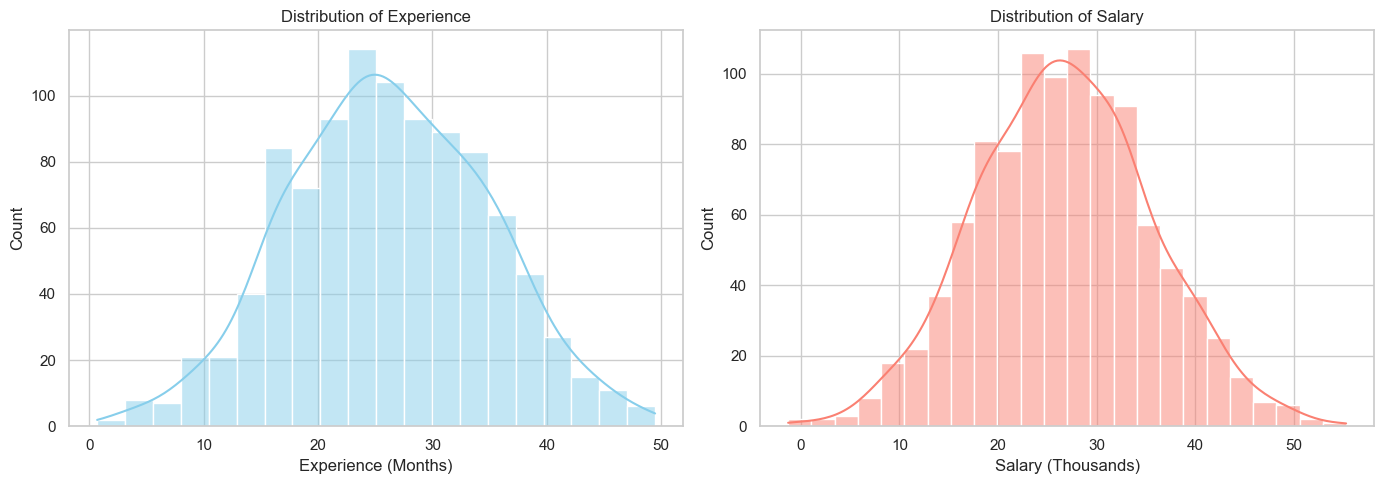

In [4]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 5))

# Histogram for Experience
plt.subplot(1, 2, 1)
sns.histplot(df['Experience_Months'], kde=True, color='skyblue')
plt.title('Distribution of Experience')
plt.xlabel('Experience (Months)')

# Histogram for Salary
plt.subplot(1, 2, 2)
sns.histplot(df['Salary_Thousands'], kde=True, color='salmon')
plt.title('Distribution of Salary')
plt.xlabel('Salary (Thousands)')

plt.tight_layout()
plt.show()

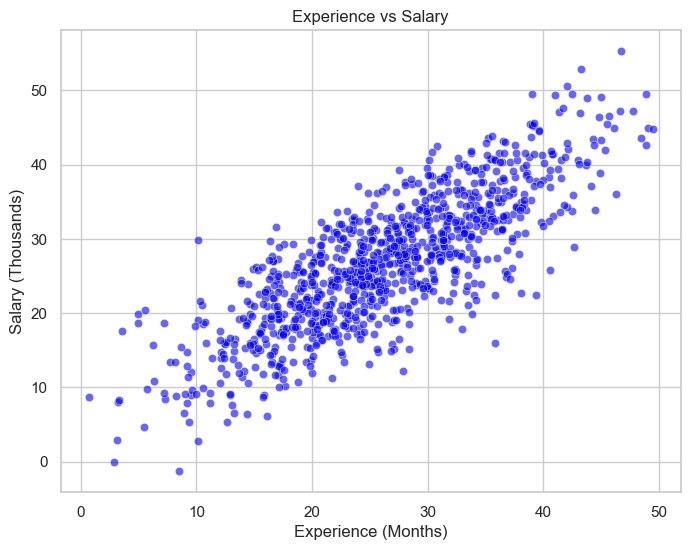

In [5]:
# Scatter Plot to check relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Experience_Months', y='Salary_Thousands', data=df, color='blue', alpha=0.6)
plt.title('Experience vs Salary')
plt.xlabel('Experience (Months)')
plt.ylabel('Salary (Thousands)')
plt.show()

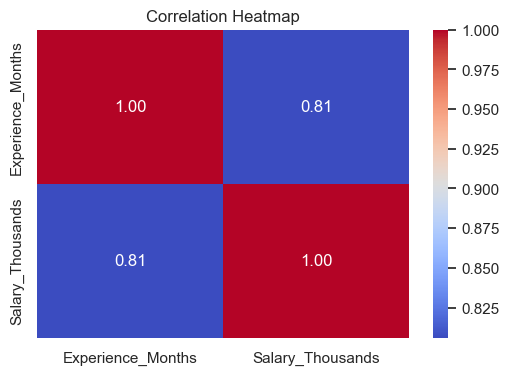

In [16]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Insights:**
- The Scatter Plot likely shows a positive trend: as experience increases, salary tends to increase.
- The Heatmap will verify the strength of this linear relationship. A value close to 1 implies a strong positive correlation.

## 4. Data Cleaning
We must ensure the data is quality-checked before feeding it into the model.

In [7]:
# 1. Check for Missing Values
print("Missing Values:\n", df.isnull().sum())

# Handling missing values (if any)
# If nulls are minimal (<5%), we can drop them. 
df.dropna(inplace=True)

# 2. Check for Duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")

Missing Values:
 Experience_Months    0
Salary_Thousands     0
dtype: int64

Number of duplicate rows: 0


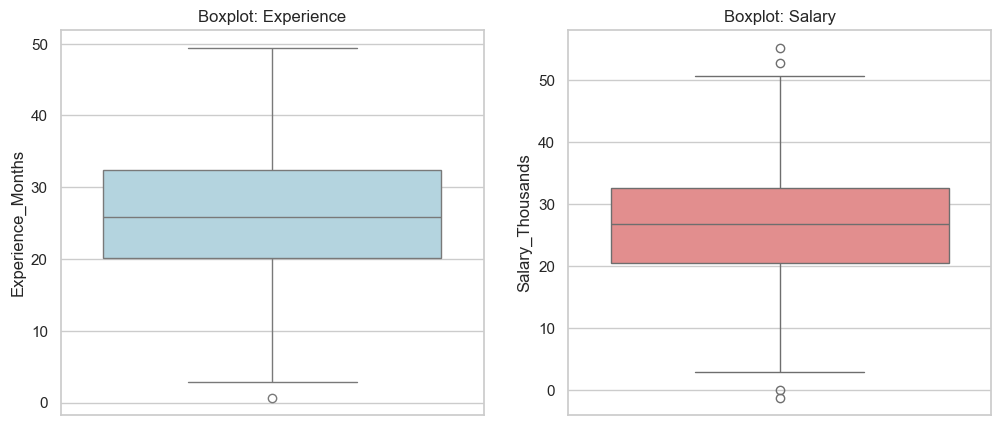

In [8]:
# 3. Outlier Detection using Boxplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Experience_Months'], color='lightblue')
plt.title('Boxplot: Experience')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Salary_Thousands'], color='lightcoral')
plt.title('Boxplot: Salary')

plt.show()

In [9]:
# Handling Outliers using IQR (Interquartile Range) Method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print(f"Shape before outlier removal: {df.shape}")
df = remove_outliers(df, 'Experience_Months')
df = remove_outliers(df, 'Salary_Thousands')
print(f"Shape after outlier removal: {df.shape}")

Shape before outlier removal: (1000, 2)
Shape after outlier removal: (995, 2)


## 5. Data Preprocessing

- **Cleaning** fixes errors in the data (nulls, duplicates).
- **Preprocessing** transforms data for the model (scaling, encoding).

For Simple Linear Regression with one feature, **Feature Scaling** is theoretically not strictly necessary for convergence like in Gradient Descent derived models, but it is good practice.

In [10]:
X = df[['Experience_Months']]  # Feature (2D array)
y = df['Salary_Thousands']     # Target (1D array)

## 6. Train-Test Split
We need to evaluate our model on unseen data to check its generalization power. We will use an **80-20 split**.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 796
Testing set size: 199


## 7. Model Selection

**Algorithm:** Linear Regression  
**Reason:** The problem is to predict a continuous numerical value, and the scatter plot suggests a linear relationship between experience and salary.

**Assumptions:**
1. Linearity: Relationship between X and y is linear.
2. Independence: Observations are independent.
3. Homoscedasticity: Constant variance of errors.
4. Normality: Residuals should be normally distributed.

## 8. Model Training

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Training Completed.")

b_1 = model.coef_[0]
b_0 = model.intercept_

print(f"Coefficient (Salary per month of exp): {b_1:.4f}")
print(f"Intercept (Base Salary): {b_0:.4f}")

print(f"\nEquation: Salary = {b_0:.2f} + ({b_1:.2f} * Experience_Months)")
print(f'{model.score(X_test,y_test)}')

Model Training Completed.
Coefficient (Salary per month of exp): 0.8183
Intercept (Base Salary): 5.2915

Equation: Salary = 5.29 + (0.82 * Experience_Months)
0.6240727223179905


**Interpretation:**  
- **Intercept:** The estimated salary when experience is 0.
- **Coefficient:** For every 1 month increase in experience, the salary increases by this amount (in thousands).

## 9. Model Evaluation

In [20]:
# Predictions on Test Data
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R2 Score: 0.6241
Mean Absolute Error (MAE): 4.0563
Mean Squared Error (MSE): 25.8553
Root Mean Squared Error (RMSE): 5.0848


**Understanding Metrics:**
- **R2 Score:** Accuracy of the model fit. Near 1 is perfect.
- **MAE:** Average absolute difference between predicted and actual salary.
- **RMSE:** Penalizes larger errors more than MAE; useful for avoiding large deviations.

## 10. Visualization of Model Performance

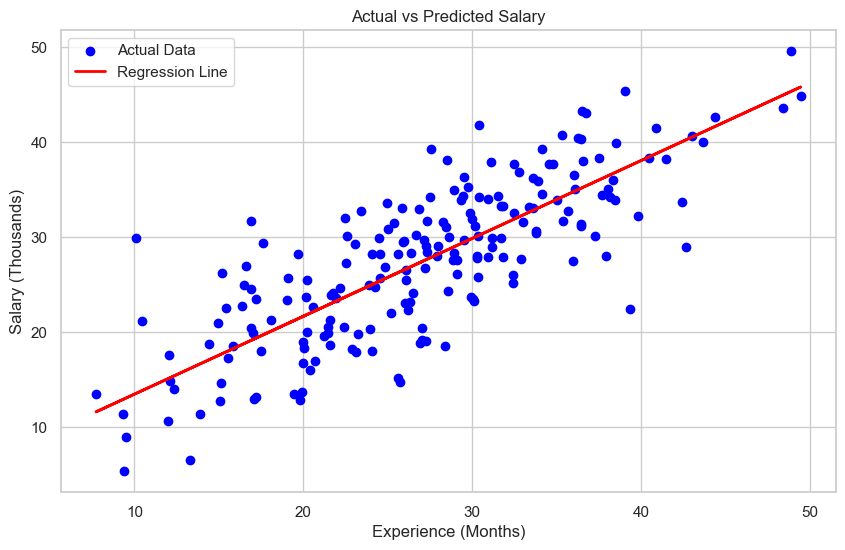

In [14]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual testing data
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Regression Line (Predictions)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Actual vs Predicted Salary')
plt.xlabel('Experience (Months)')
plt.ylabel('Salary (Thousands)')
plt.legend()
plt.show()

## 11. Prediction
Let's predict salary for a new candidate.

In [15]:
# Example inputs: 12 months, 24 months, 60 months
new_data = np.array([[12], [24], [60]])
predictions = model.predict(new_data)

for exp, sal in zip(new_data.flatten(), predictions):
    print(f"Experience: {exp} months -> Predicted Salary: {sal:.2f} k")

Experience: 12 months -> Predicted Salary: 15.11 k
Experience: 24 months -> Predicted Salary: 24.93 k
Experience: 60 months -> Predicted Salary: 54.39 k


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 12. Final Conclusion

**Summary:**
- We successfully loaded the Experience-Salary dataset and cleaned it by removing outliers/duplicates.
- EDA confirmed a linear correlation between experience and salary.
- We trained a Linear Regression model with an 80-20 train-test split.
- The R2 score indicates how well our model explains the variance in the data.

**Limitations:**
- The model assumes a strictly linear relationship, which might not hold for very high experience levels (diminishing returns).
- It uses only one feature; real-world salary depends on role, location, and skills.

**Future Improvements:**
- Collect more features (Education, Job Role, City).
- Try Polynomial Regression if the pattern shows curvature.